In [40]:
import pandas as pd
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
english_stemmer = SnowballStemmer('english')
nlp = spacy.load('es_core_news_sm')
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
nltk.download("punkt")


In [85]:
df = pd.read_csv('data_videos.csv', sep = "|")
df = df[df['description'].notnull()]

In [86]:
def tokenize1(text):
    doc = nlp(text)
    words = [t.orth_ for t in doc if not t.is_punct | t.is_stop]
    words = [w for w in words if not w in stop_words] 
    lexical_tokens = [t.lower() for t in words if t.isalpha()]
    return lexical_tokens

In [87]:
df["title_description"] = df["title"] + df["description"] 


In [114]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
stop_words = nltk.corpus.stopwords.words('english')
newStopWords = ['https', 'com', 'www', 'http', 'ly', 'bit', 'us', 'follow', 'suscribe', 'channel',
               'watch', 'youtu', 'facebook', 'twitter', 'instagram', 'de', 'youtube', 'subscribe', 'video']
stop_words.extend(newStopWords)

In [ ]:
df

In [115]:
def get_top_n_words(corpus, n=1,k=1):
    vec = CountVectorizer(ngram_range=(k,k), stop_words = stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [116]:
common_words = get_top_n_words(df['title_description'], 30, 1)
for word, freq in common_words:
    print(word, freq)

news 28487
covid 8340
new 7294
like 6921
19 6815
videos 6729
live 6337
get 6081
world 5866
amzn 5400
mask 5162
org 5005
one 4939
cnbc 4868
also 4736
tv 4675
music 4589
latest 4577
link 4518
india 4470
make 4465
people 4340
show 4311
nbc 4207
coronavirus 4132
face 3931
goo 3911
gl 3896
playlist 3738
dr 3631


In [144]:
common_words2 = get_top_n_words(df['title'], 30, 1)
for word, freq in common_words:
    print(word, freq)

news 28487
covid 8340
new 7294
like 6921
19 6815
videos 6729
live 6337
get 6081
world 5866
amzn 5400
mask 5162
org 5005
one 4939
cnbc 4868
also 4736
tv 4675
music 4589
latest 4577
link 4518
india 4470
make 4465
people 4340
show 4311
nbc 4207
coronavirus 4132
face 3931
goo 3911
gl 3896
playlist 3738
dr 3631


In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,1), use_idf=True, tokenizer = tokenize1)
X = vectorizer.fit_transform(df["title_description"])

In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,1), use_idf=True, tokenizer = tokenize1)
X1 = vectorizer.fit_transform(df["title"])

In [94]:
X

<19899x27710 sparse matrix of type '<class 'numpy.float64'>'
	with 178670 stored elements in Compressed Sparse Row format>

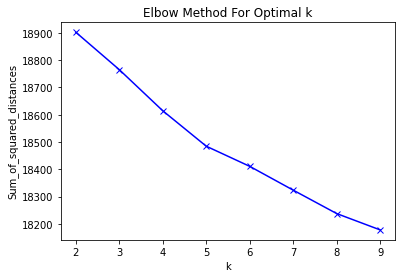

In [118]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

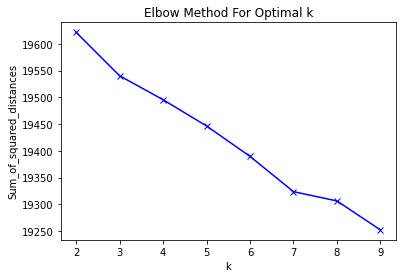

In [146]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X1)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [119]:
true_k = 8
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(df["title_description"],labels)),columns=['title','cluster'])
print(wiki_cl)

                                                   title  cluster
0      White House Covid-19 Response Team Holds Brief...        0
1      Covid spreading faster in India than anywhere ...        7
2      COVID-19 ‘spreading like wildfire’ despite inc...        2
3      Covid-19: Nearly 100,000 catching virus every ...        7
4      What are the Covid risks and how do you stay s...        7
...                                                  ...      ...
19894  System Of A Down - Chop Suey! (Official Video)...        2
19895  Cat Never Gives Up Her Disabled Child Who Cant...        7
19896  How sugar affects the brain - Nicole AvenaChec...        2
19897  7 Signs Of Unhealthy Gut And How To Improve Gu...        7
19898  Longevity & Why I now eat One Meal a DayWhy ha...        7

[19899 rows x 2 columns]


In [147]:
true_k = 7
model1 = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model1.fit(X1)
labels1=model1.labels_
wiki_cl1=pd.DataFrame(list(zip(df["title"],labels)),columns=['title','cluster'])
print(wiki_cl1)

                                                   title  cluster
0      White House Covid-19 Response Team Holds Brief...        0
1      Covid spreading faster in India than anywhere ...        7
2      COVID-19 ‘spreading like wildfire’ despite inc...        2
3      Covid-19: Nearly 100,000 catching virus every ...        7
4      What are the Covid risks and how do you stay s...        7
...                                                  ...      ...
19894     System Of A Down - Chop Suey! (Official Video)        2
19895  Cat Never Gives Up Her Disabled Child Who Cant...        7
19896         How sugar affects the brain - Nicole Avena        2
19897  7 Signs Of Unhealthy Gut And How To Improve Gu...        7
19898           Longevity & Why I now eat One Meal a Day        7

[19899 rows x 2 columns]


Cluster: 0
Titles


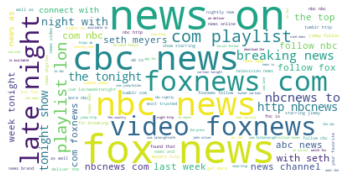

Cluster: 1
Titles


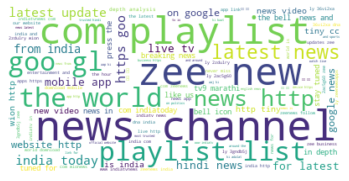

Cluster: 2
Titles


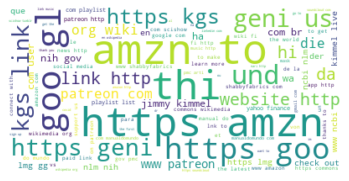

Cluster: 3
Titles


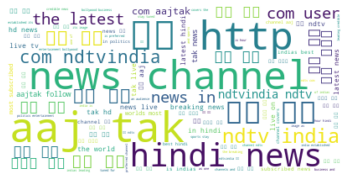

Cluster: 4
Titles


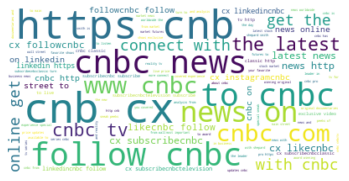

Cluster: 5
Titles


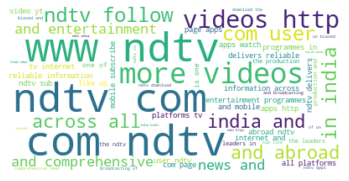

Cluster: 6
Titles


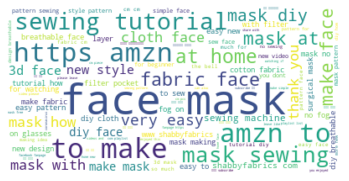

Cluster: 7
Titles


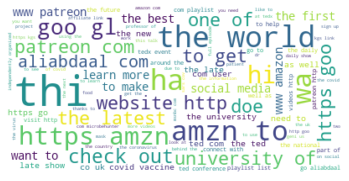

In [140]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':df["title_description"]}
result=pd.DataFrame(result)
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['wiki'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, stopwords=stop_words,background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   print('Titles')
   titles=wiki_cl[wiki_cl.cluster==k]['title']         
   #print(titles.to_string(index=False))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()

Cluster: 0
Titles


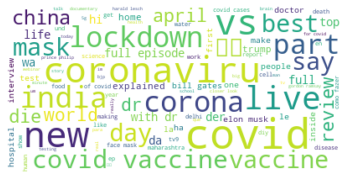

Cluster: 1
Titles


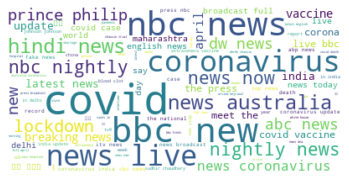

Cluster: 2
Titles


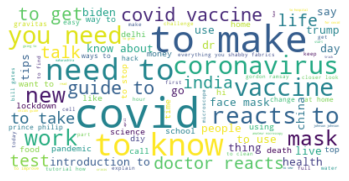

Cluster: 3
Titles


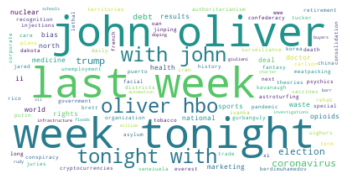

Cluster: 4
Titles


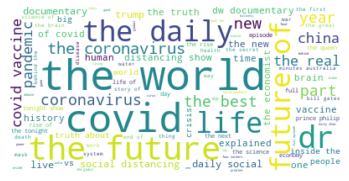

Cluster: 5
Titles


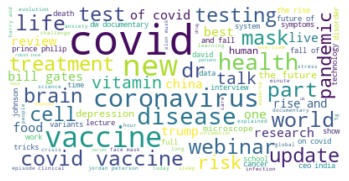

Cluster: 6
Titles


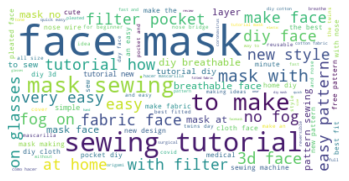

In [148]:
from wordcloud import WordCloud
result={'cluster':labels1,'wiki':df["title"]}
result=pd.DataFrame(result)
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['wiki'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, stopwords=stop_words,background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   print('Titles')
   titles=wiki_cl1[wiki_cl1.cluster==k]['title']         
   #print(titles.to_string(index=False))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()

In [149]:
# SEcond alternative
from gensim.corpora.dictionary import Dictionary

In [ ]:
# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vectorizer.vocabulary_.items())
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`
ldamodel = gensim.models.LdaMulticore(corpus=corpus, id2word=id_map, passes=2,
                                               random_state=5, num_topics=10, workers=2)

Process ForkPoolWorker-3:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/pool.py", line 105, in worker
    initializer(*initargs)
  File "/opt/anaconda3/lib/python3.7/site-packages/gensim/models/ldamulticore.py", line 337, in worker_e_step
    worker_lda.do_estep(chunk)  # TODO: auto-tune alpha?
  File "/opt/anaconda3/lib/python3.7/site-packages/gensim/models/ldamodel.py", line 742, in do_estep
    gamma, sstats = self.inference(chunk, collect_sstats=True)
  File "/opt/anaconda3/lib/python3.7/site-packages/gensim/models/ldamodel.py", line 680, in inference
    expElogbetad = self.expElogbeta[:, ids]
IndexError: index 61872 is out of bounds for axis 1 with size 25191
Process ForkPoolWorker-4:
Traceback (most recent ca

  File "/opt/anaconda3/lib/python3.7/site-packages/gensim/models/ldamodel.py", line 680, in inference
    expElogbetad = self.expElogbeta[:, ids]
IndexError: index 50720 is out of bounds for axis 1 with size 25191
Process ForkPoolWorker-12:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib/python3.7/multiprocessing/pool.py", line 105, in worker
    initializer(*initargs)
  File "/opt/anaconda3/lib/python3.7/site-packages/gensim/models/ldamulticore.py", line 337, in worker_e_step
    worker_lda.do_estep(chunk)  # TODO: auto-tune alpha?
  File "/opt/anaconda3/lib/python3.7/site-packages/gensim/models/ldamodel.py", line 742, in do_estep
    gamma, sstats = self.inference(chunk, collect_sstats=True)
  File "/opt/anaconda3/lib/python3.7/site-packages

In [143]:
for idx, topic in ldamodel.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.002*"kimmel" + 0.001*"sakshi" + 0.001*"oven" + 0.001*"jimmy" + 0.001*"the" + 0.000*"bach" + 0.000*"and" + 0.000*"chit" + 0.000*"to" + 0.000*"of"


Topic: 1 
Words: 0.004*"nbc" + 0.003*"late" + 0.003*"mundo" + 0.003*"manual" + 0.003*"the" + 0.002*"night" + 0.002*"postal" + 0.002*"sp" + 0.002*"microcosmos" + 0.002*"and"


Topic: 2 
Words: 0.006*"und" + 0.006*"die" + 0.006*"der" + 0.003*"auf" + 0.002*"das" + 0.002*"mit" + 0.002*"zu" + 0.002*"von" + 0.002*"den" + 0.002*"ist"


Topic: 3 
Words: 0.010*"mask" + 0.007*"face" + 0.004*"sewing" + 0.003*"diy" + 0.003*"tutorial" + 0.003*"cm" + 0.003*"easy" + 0.002*"breathable" + 0.002*"fabric" + 0.002*"pattern"


Topic: 4 
Words: 0.002*"y" + 0.001*"yahoo" + 0.001*"ar" + 0.001*"par" + 0.001*"crux" + 0.001*"morgellons" + 0.000*"noticias" + 0.000*"suscríbete" + 0.000*"sociales" + 0.000*"vai"


Topic: 5 
Words: 0.012*"e" + 0.007*"o" + 0.005*"com" + 0.004*"em" + 0.004*"um" + 0.004*"mari" + 0.004*"do" + 0.003*"é" + 0.003*"fazer" + 0.00